# 밑바닥부터 시작하는 딥러닝1
***

- 미분은 $x$의 작은 변화가 함수 $f(x)$를 얼마나 변화시키느냐를 의미한다.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
def numerical_diff(f, x) :
    
    h = 1e-50
    
    return (f(x + h) - f(x)) / h

위의 경우 반올림 오차(너무 작은 수일 경우 0으로 반환)로 인해 문제가 발생한다.

그리고 $f(x + h) - f(x)$의 근사로 구해진 접선이기 때문에 실제 접선과는 오차가 존재한다.

이를 위해 $(x + h)$와 $(x - h)$의 함수 $f$의 차분을 계산하는 방법을 사용하는데 이를 **중심 차분** 혹은 **중앙 차분**이라고 한다.

In [5]:
def numerical_diff(f, x) :
    
    h = 1e-4
    
    return (f(x + h) - f(x - h)) / (2 * h)

In [6]:
def function_1(x) :
    return 0.01 * x ** 2 + 0.1 * x

In [7]:
x = np.arange(0, 20, 0.1)

In [8]:
y = function_1(x)

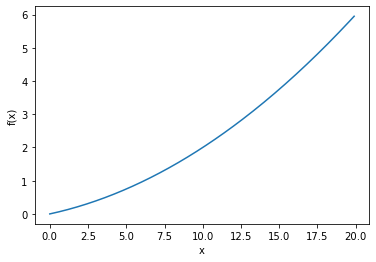

In [9]:
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [10]:
numerical_diff(function_1, 5)

0.1999999999990898

In [11]:
numerical_diff(function_1, 10)

0.2999999999986347

위의 수식을 미분하면 $0.02x + 0.1$로 $x$가 각각 5와 10일 때 미분 값은 0.2와 0.3이다.

바로 위의 결과와 비교할 때 오차가 매우 작음을 알 수 있다.

***
### 편미분
- 편미분은 변수가 여러개인 함수에 대한 미분을 의미한다.
- $f(x_{0}, x_{1}) = x_{0}^2 + x_{1}^2$

In [12]:
def function_2(x) :
    return x[0] ** 2 + x[1] ** 2

In [13]:
def function_tmp1(x0) :
    return x0 * x0 + 4.0 ** 2.0

- $x_{0} = 3, x_{1} = 4$

In [14]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [15]:
def function_tmp2(x1) :
    return 3.0 * 2.0 + x1 * x1

In [16]:
numerical_diff(function_tmp2, 4.0)

7.999999999999119

편미분은 특정 장소의 기울기를 구한다. 단, 여러 변수 중 대상 변수 하나에 초점을 맞추고 다른 변수는 값을 고정한다.

***
### 기울기
- 모든 변수의 편미분을 벡터로 정리한 것을 **기울기**라고 한다.

In [17]:
def numerical_gradient(f, x) :
    
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size) :
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val
        
    return grad

In [18]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [19]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [20]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

기울기가 가리키는 방향은 각 지점(x, y)에서 함수의 출력 값을 가장 크게 줄이는 방향이다.
***
#### 경사법(경사 하강법)

기계학습 문제는 최적의 매개변수를 찾아야 하는데 매개변수 공간이 매우 커서 어디가 최솟값이 되는지 알 수 없다. 이 때, 기울기를 이용하여 함수의 최솟값을 찾으려는 것이 경사법이다.

<center>$x_{0}$ = $x_{0} - \eta *  \frac {\partial f} {\partial x_{0}}$<center>
<center>$x_{1}$ = $x_{1} - \eta *  \frac {\partial f} {\partial x_{1}}$<center>
    
**$\eta$**는 **학습률**로 매개변수 값을 갱신하는 일종의 가중치(?)를 의미한다.

In [21]:
def gradient_descent(f, init_x, lr = 0.01, step_num = 100) :
    
    x = init_x
    
    for i in range(step_num) :
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x

In [25]:
init_x = np.array([-3.0, -4.0])

In [26]:
gradient_descent(function_2, init_x, lr = 0.1, step_num = 100)

array([-6.11110793e-10, -8.14814391e-10])

function_2가 원의 방정식이였기 때문에 (0, 0)이 최솟값이다.

In [27]:
gradient_descent(function_2, init_x, lr = 10, step_num = 100)

array([2.34235971e+12, 3.96091057e+12])

learning_rate가 크면 위와 같이 매우 큰 값으로 발산한다.

In [28]:
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

In [29]:
class simpleNet :
    
    def __init__(self) :
        self.W = np.random.randn(2, 3)
        
    def predict(self, x) :
        return np.dot(x, self.W)
    
    def loss(self, x, t) :
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [30]:
net = simpleNet()

In [31]:
print(net.W)

[[ 0.83603533 -1.14743657 -0.06728812]
 [-0.80338134 -0.4837601   1.98677514]]


In [32]:
x = np.array([0.6, 0.9])

In [33]:
p = net.predict(x)

In [34]:
p

array([-0.22142201, -1.12384603,  1.74772475])

In [35]:
np.argmax(p)

2

In [36]:
t = np.array([0, 0, 1])

In [38]:
net.loss(x, t)

0.17913802083775315

손실함수 경사하강법

In [39]:
def f(W) :
    return net.loss(x, t)

In [40]:
dW = numerical_gradient(f, net.W)

In [42]:
dW

array([[ 0.07001047,  0.02839522, -0.0984057 ],
       [ 0.10501571,  0.04259283, -0.14760854]])

$$\frac {\partial L} {\partial w_{11}} = 0.07, \frac {\partial L} {\partial w_{23}} = -0.1476$$

w11을 h만큼 늘리면 0.07h만큼 증가하고 w23을 h만큼 늘리면 0.1476h만큼 감소한다.